Directory Check!
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/PI/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/fdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/nofdp/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/II/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] /data/inho/nvme_fio/Cyl

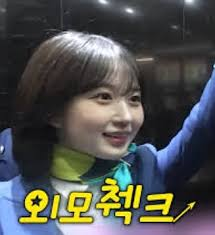

Directory Check!


In [2]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import re 
import sys
import os
import collections
from inho_parser import * 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns 
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import re 
import sys
import os
import collections
import inho_parser
from inho_parser import * 
from math import *
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
## ------------------------------------------------------------- ##
##              Example waf parser in warmup in FADU             ##
## ------------------------------------------------------------- ##
# ----------------------- Regular Expr. ------------------------- #
output_re=re.compile(r'.*_output')
num_re=re.compile(r'[0-9]+')
hbmw_re=re.compile(r'.*(HBMW)')
mbmw_re=re.compile(r'.*(MBMW)')
mbe_mre=re.compile(r'.*(MBE)')
mbe_re=re.compile(r'.*(MBE)')

total_bw_re=re.compile(r'.*READ: bw=')
nvme_iostat_re=re.compile(r'nvme1n1')
#write_bw_re=re.compile()
# ----------------------- Figure Expr. ------------------------- #

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
mpl.rcParams['savefig.pad_inches'] = 0
isConference=True

dev_list = []
re_dev=re.compile(r'^FADU-FDP+|^Samsung+')
#%ls './FEMU/'


def first_available_font(candidates):
    available = {f.name for f in fm.fontManager.ttflist}
    for name in candidates:
        if name in available:
            return name
    return None

def get_per_ruh_waf_to_dict (data_dir, filename=None, verbose=None):
    # ----------------------- Regular Expr. ------------------------- #
    ruh_re=re.compile(r'^Reclaim Unit Handle.*')
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    if verbose is None : 
        verbose = False
    # ---------------------------------------------------------------- #

    ruh_waf = {} 
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if ruh_re.match(line) :
            l = num_re.findall(line)
            ruhid = int(l[0])
            hbmw = int(l[3])
            mbmw = int(l[4])
            if (ruhid == 0) or (ruhid == 1) or (ruhid == 2) or (ruhid == 15)or (ruhid == 7):
                if (hbmw == 0) or (mbmw == 0):
                    #print (ruhid , 1.0)
                    if not (ruhid in ruh_waf):
                        ruh_waf[ruhid] = [float(1.0)]
                    else:
                        ruh_waf[ruhid].append(float(1.0))
                else:
                    #print(ruhid, mbmw/hbmw)
                    if not (ruhid in ruh_waf):
                        ruh_waf[ruhid] = [mbmw/hbmw]
                    else:
                        ruh_waf[ruhid].append(float(mbmw/hbmw))
    if not (verbose):
        for key in ruh_waf.keys():
            print(key, ruh_waf[key][-1] )
            #ax[i].plot(range(len(ruh_waf[key])), ruh_waf[key] , label = key)
            #ax[i].set_ylim([0.99, 4.0])
            #ax[i].set_title(t)

    return ruh_waf

def get_per_ruh_mb_to_list (data_dir, filename=None, verbose=None):
    # ----------------------- Regular Expr. ------------------------- #
    ruh_re=re.compile(r'^Reclaim Unit Handle.*')
    num_re=re.compile(r'[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    # ---------------------------------------------------------------- #

    if filename is None:
        filename = "samsung_waf_1sec.txt"
    if verbose is None : 
        verbose = False
    # ---------------------------------------------------------------- #

    ruh_waf = {} 
    ruh_hbmw = {}
    ruh_mbmw = {}
    waf_data = data_dir+filename
    file1 = open(waf_data, 'r')
    Lines = file1.readlines()
    start_h = None
    start_d = None
    start_e = None
    for line in Lines:
        line = ''.join(line).strip().replace(",", '')
        if ruh_re.match(line) :
            l = num_re.findall(line)
            ruhid = int(l[0])
            hbmw = int(l[3])
            mbmw = int(l[4])
            if (ruhid == 0) or (ruhid == 1)or (ruhid == 2) or (ruhid == 15)or (ruhid == 7):
                if (hbmw == 0) or (mbmw == 0):
                    #print (ruhid , 1.0)
                    if not (ruhid in ruh_hbmw):
                        #ruh_waf[ruhid] = [float(1.0)]
                        ruh_hbmw[ruhid] = [int(0)]
                        ruh_mbmw[ruhid] = [int(0)]
                    else:
                        #ruh_waf[ruhid].append(float(1.0))
                        ruh_hbmw[ruhid].append(int(0))
                        ruh_mbmw[ruhid].append(int(0))
                else:
                    #print(ruhid, mbmw/hbmw)
                    if not (ruhid in ruh_hbmw):
                        #ruh_waf[ruhid] = [mbmw/hbmw]
                        ruh_hbmw[ruhid] = [int(0)]
                        ruh_mbmw[ruhid] = [int(0)]
                    else:
                        #ruh_waf[ruhid].append(float(mbmw/hbmw))
                        ruh_hbmw[ruhid].append(hbmw)
                        ruh_mbmw[ruhid].append(mbmw)
    if not (verbose):
        for key in ruh_waf.keys():
            print(key, ruh_waf[key][-1] )
            #ax[i].plot(range(len(ruh_waf[key])), ruh_waf[key] , label = key)
            #ax[i].set_ylim([0.99, 4.0])
            #ax[i].set_title(t)

    return [ruh_hbmw,ruh_mbmw]

def get_per_ruh_waf_to_list (data_dir, subdir, filename=None, verbose=None):
    # ---------------------------------------------------------------- #
    if filename is None:
        filename = "samsung_waf_1sec.txt"
    # ---------------------------------------------------------------- #
    per_ruh_waf_list = []

    for i,t in enumerate(subdir):
        per_ruh_waf_list.append(get_per_ruh_waf_to_dict(data_dir+t, filename=None))
        print(t)

    
    return per_ruh_waf_list


# Prefer Arial; otherwise use Liberation Sans, then Lato, then DejaVu Sans
math_family = first_available_font(['Arial', 'Liberation Sans', 'Lato', 'DejaVu Sans'])
if math_family is None:
    print("WTF DejaVu Sans")
    math_family = 'DejaVu Sans'  # last-resort

# Make mathtext use the chosen family (instead of DejaVu fallback)
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = math_family
mpl.rcParams['mathtext.it'] = f'{math_family}:italic'
mpl.rcParams['mathtext.bf'] = f'{math_family}:bold'

# Try to use Helvetica or fallback to similar fonts
# Step 1: Provide full path to Helvetica.ttc
# Load Helvetica.ttc manually
font_path = "./archive/Helvetica.ttc"
helvetica_prop = fm.FontProperties(fname=font_path)
# Step 1: Manually load Helvetica.ttc
font_path = './archive/Helvetica.ttc'
helvetica_font = fm.FontProperties(fname=font_path)
font_name = helvetica_font.get_name()

# Step 2: Add to font manager cache
fm.fontManager.addfont(font_path)

# Step 3: Now set as default
mpl.rcParams['font.family'] = font_name
mpl.rcParams['font.family'] = helvetica_prop.get_name()


#!pip3 install IPython
import IPython
from IPython.display import Image
import os
from colorama import Fore, Style

def check_file_existence(directory, filename=None):
    if(filename == None):
        filename = "samsung_waf_1sec.txt"
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        print(f"{Fore.GREEN}[Check!]{Style.RESET_ALL} {file_path}")
        return 1
    else:
        print(f"{Fore.RED}['No such file/dir']{Style.RESET_ALL} {file_path}")
        return 0 

print("Directory Check!")

dirpath="/data/inho/nvme_fio/Cylon-FDP/warmup_v3/seq_rand_and_jump/"

ruht_dirs=[
    'II/',
    'PI/'
]

workloads = [
    'zipf_1.2/',
    'zoned/',
    '90rand_zipf1.2/',
    'sq0_90r_zipf_1.2/',
]
subdirs=[
    'fdp/',
    'nofdp/',
    'fdp_share/'
]

#filename = input("Enter the filename to check: ")
for w in workloads:
    for ruht in ruht_dirs:
        for sdir in subdirs:
            check_file_existence(dirpath+ruht+w+sdir)
#Image("/data/inho/OH1_.png") 
display(Image("/data/inho/check.png"))
print("Directory Check!")


# Original Code & Result

## Fig13

[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


hbmw_list_TB 6.591972555433001


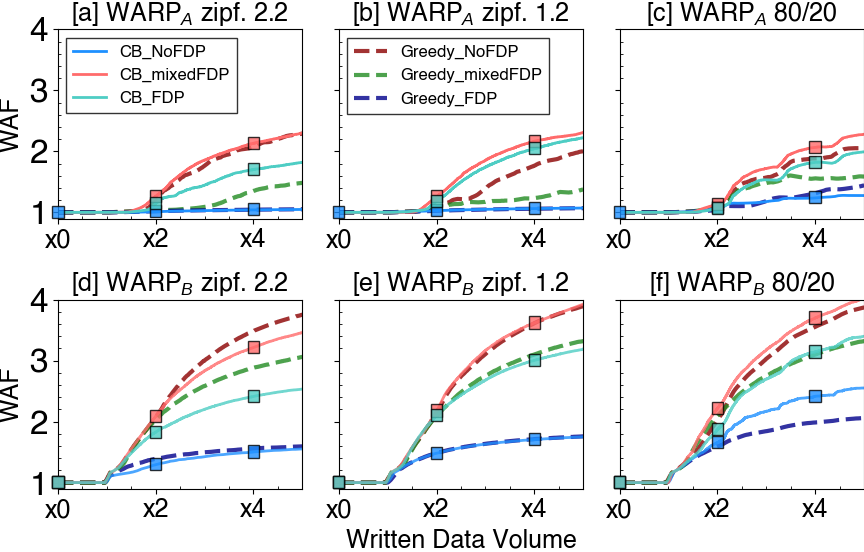

In [5]:
#------------------------------------------------------------#
fig, ax = plt.subplots(2,3, figsize=(9,6), sharey=True)
plt.style.use('tableau-colorblind10')
#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    "nofdp_R256OP20/":"#D4AF37",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
#------------------------------------------------------------#

#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
#fdev=
#util = ['{0}p/'.format(x) for x in np.arange(90,170,10) ]
#workload= ['fileserver' , 'oltp', 'varmail']
#workload= ['PI/zipf_1.2/', 'PI/zoned/']
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['nofdp/','fdp_share/','fdp/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/"
data_dir = "./archive/result-FIO/cylon224-PI/GCe/3stream/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 7
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]

        #ax2 = ax[i//2][i%2].twinx()
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
#------------------------------------------------------------#

workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/quick/"
data_dir = "./archive/result-FIO/cylon224-PI/GCcb/"
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 5
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,  label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])
        #ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)

        if (re.match(sdir,"nofdp/") ) :
            #ax2.plot(range(0,len(waf_list)), waf_list, linewidth=0.1, color='red', marker='o', markersize=1, label=t_labels[j], alpha=0.5)
            #ax2.plot(hbmw_list_TB, waf_list, linewidth=1, marker='o', markersize=1, label=t_labels[j], alpha=0.5, color='red')
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0:
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                # #Text
                # ax2.text(k*hop+a, v-0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                # #Box
                # ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict( fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0 :
                    #Text
                    #ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                    #Box
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/"
data_dir ="./archive/result-FIO/warpb-cylon224-PI/GCe/3stream/"

TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)

        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
        ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
#------------------------------------------------------------#
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/"
data_dir ="./archive/result-FIO/warpb-cylon224-PI/GCcb/3stream/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,alpha=0.8, label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])

        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
        if (re.match(sdir,"nofdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # if k> 0:
                #     ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                #ax2.text(k*hop, v, " " , ha="center",  fontsize=5, bbox=dict(boxstyle='circle', fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
MEDIUM_PLUS_SIZE=MEDIUM_SIZE+2

# Collect handles and labels from the full figure
handles, labels = ax[0][0].get_legend_handles_labels()

# Split into two groups (first 3 and last 3, adjust as needed)
handles1, labels1 = handles[:3], labels[:3]
handles2, labels2 = handles[3:], labels[3:]

# Rename labels (example)
labels1 = ["Greedy_NoFDP", "Greedy_mixedFDP", "Greedy_FDP"]
labels2 = ["CB_NoFDP", "CB_mixedFDP", "CB_FDP"]

# Place legends in different axes
ax[0][0].legend(handles2, labels2, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)
ax[0][1].legend(handles1, labels1, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)


ax[0][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

#fig.text(0.34, 0.01,  r'Written Data Volume', fontsize=MEDIUM_SIZE+2)
ax[1][1].set_xlabel(r'Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_title(r"[a] WARP$_{A}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][1].set_title(r"[b] WARP$_{A}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][2].set_title(r"[c] WARP$_{A}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_title(r"[d] WARP$_{B}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][1].set_title(r"[e] WARP$_{B}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][2].set_title(r"[f] WARP$_{B}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


for i in range(2):
    for j in range(3):
        ax2 = ax[i][j]
        ax2.tick_params(axis='x', which='minor', direction='in')
        ax2.tick_params(axis='y', which='minor', direction='in')
        ax2.minorticks_on()
        ax2.set_xlim([0,5])
        ax2.set_ylim([0.9 , 4.0])
        ax2.set_xticks([0,2,4])
        labels = [label.get_text() for label in ax2.get_xticklabels()]
        ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_yticks([1, 2, 3, 4])
ax[1][0].set_yticks([1, 2, 3, 4])


fig.tight_layout(rect=[0, 0.02, 1, 1])

#------------------------#
isConference = False
if (isConference) :
    save_dir = "./archive"
    fig_name = "3stream_WARP"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.png".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name)) #, dpi=100)
#------------------------#
plt.show()


## Fig15

[Check!] ./archive/ops-log/log-gc-zipf22-fdp
anchor_index  1  skipped 
anchor_index  2  skipped 
[Check!] ./archive/ops-log/log-gc-zipf12-fdp
anchor_index  1  skipped 
anchor_index  2  skipped 
[Check!] ./archive/ops-log/log-gc-zoned-fdp
anchor_index  1  skipped 


/tmp/ipykernel_2340023/3149245954.py:371: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


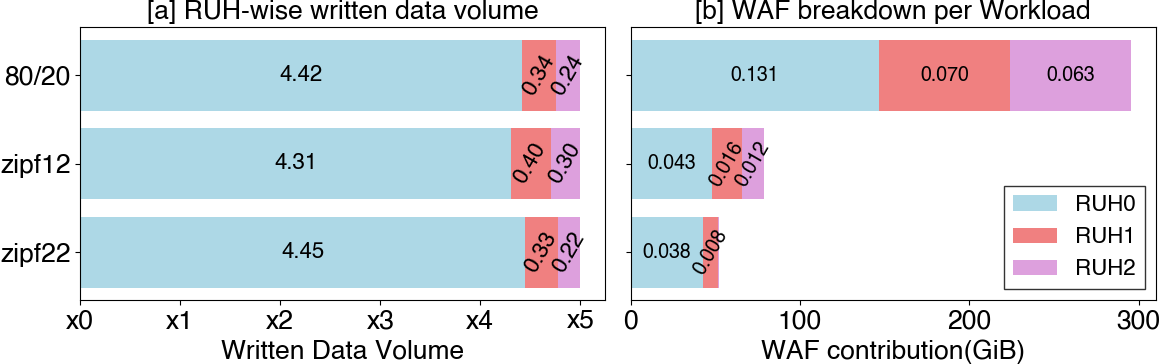

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

#=======================================================================================#
this_dev_cap_GB = 224 * 1024 * 1024 * 1024
this_dev_cap = 224

data_dir = "./archive/ops-log/"
workload = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
]
hbmw_data = {
    'log-gc-zipf22-fdp': [[-1], [-1], [-1]],
    'log-gc-zipf12-fdp': [[-1], [-1], [-1]],
    'log-gc-zoned-fdp':  [[-1], [-1], [-1]],
}
mbmw_data = {
    'log-gc-zipf22-fdp': [[-1], [-1], [-1]],
    'log-gc-zipf12-fdp': [[-1], [-1], [-1]],
    'log-gc-zoned-fdp':  [[-1], [-1], [-1]],
}

bar_colors = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']

group_gap = 1.1
inner_gap = 0.4
x = []
for g in range(3):  # 3 RUH groups
    base = g * group_gap + g * 2 * inner_gap
    x.extend([base + i * inner_gap for i in range(2)])

x = np.array(x)

x_labels = []
for r in [0, 1, 2]:
    #x_labels.extend([f"RUH{r}\n5\nhbmw", f"RUH{r}\n5\nmbmw"])
    x_labels.extend([f"RUH{r} h.", f"RUH{r} m."])
            
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    ret = check_file_existence(data_dir,w)
    if (ret == 0):
        continue
    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    #float_re=re.compile(r'[0-9]\.[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    util_data = data_dir
    file1 = open(util_data + w, 'r')
    hbmw_total = []
    avg_util={
        0:[],
        1:[],
        2:[]
    }
    valid_util={
        0:[],
        1:[],
        2:[]
    }
    ruh_hbmw={
        0:[],
        1:[],
        2:[]
    }
    ruh_mbmw={
        0:[],
        1:[],
        2:[]
    }    

    # --------------------------- FILE ------------------------ # 
    cnt=0
    anchor_index=0    
    x_point = 5
    local_ruh_hbmw=[[],[],[]]
    local_ruh_mbmw=[[],[],[]]
    
    Lines = file1.readlines()
    for j, line in enumerate(Lines) : 
        line = ''.join(line).strip().replace(",", '')
        #if num_re.match(line):
        l = num_re.findall(line)
        l = [ int(x) for x in l ]
        if(len(l) == 1 ):
            continue
        #print(l)
        #print(l[0], l[1], l[2], l[4]/l[5], type( l[4]/l[5]))
        # if l[2] != 0:
        #     print( "is_force {0} util {1} ruhid {2}".format(l[0], float(l[4]/l[5]), l[2]) )

        value_hbmw_total = 0
        for idx,id in enumerate(range(3)):
            ruhid=l[ 6 + idx*3 ]
            value=l[ 6 + idx*3 + 1]
            value_2nd=l[ 6 + idx*3 + 2]
            value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
            value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
            value_hbmw_total += value_ruh_hbmw
            if ( not (ruhid in avg_util )): #(not (key in data_column) )
                avg_util[ruhid] = [value]
                valid_util[ruhid] = [value_2nd / l[5]]
                ruh_hbmw[ruhid] = [value_ruh_hbmw  / this_dev_cap_GB]
                ruh_mbmw[ruhid] = [value_ruh_mbmw  / this_dev_cap_GB]

            else:
                avg_util[ruhid].append(value)
                valid_util[ruhid].append(value_2nd / l[5])
                ruh_hbmw[ruhid].append(value_ruh_hbmw  / this_dev_cap_GB)
                ruh_mbmw[ruhid].append(value_ruh_mbmw  / this_dev_cap_GB)
                
        
        hb = value_hbmw_total / ( this_dev_cap * 2**30 )
        hbmw_total.append(hb)
        
        if ( (x_point*(anchor_index+1)-0.1 < hb )) and ( hb <= (x_point*(anchor_index+1)+0.1) ):
            for idx,id in enumerate(range(3)):
                value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
                value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
                #local_ruh_waf[idx].append( value_ruh_mbmw / value_ruh_mbmw )
                local_ruh_hbmw[idx].append( value_ruh_hbmw ) 
                local_ruh_mbmw[idx].append( value_ruh_mbmw ) 
                #print(anchor_index, local_ruh_hbmw ,  local_ruh_mbmw)
            cnt+=1
            continue
        else : 
            if cnt >= 1:
                
                #print(anchor_index, local_ruh_hbmw ,  local_ruh_mbmw)
                for idx,id in enumerate(range(3)):
                    #local_ruh_waf =  np.mean(local_ruh_waf[idx])
                    try:
                        hbmw_data[w][idx][anchor_index] = np.mean(local_ruh_hbmw[idx])/ 2**30
                        mbmw_data[w][idx][anchor_index] = np.mean(local_ruh_mbmw[idx])/ 2**30
                    except IndexError:
                        print("anchor_index ", anchor_index, " skipped ")
                        break
                cnt=0
                local_ruh_hbmw=[[],[],[]]
                local_ruh_mbmw=[[],[],[]]                    
                anchor_index+=1
        if j > 15000 : 
            break
    # --------------------------- FILE ------------------------ # 

    values = []
    for ruh in range(3):
        values.append(hbmw_data[w][ruh][0])  # 5 hbmw
        values.append(mbmw_data[w][ruh][0])  # 5 mbmw
        
workloads = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
]
workloads_name = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    '80/20',
]
colors = ['lightblue', 'lightcoral', 'plum']
ruh_labels = ['RUH0', 'RUH1', 'RUH2']
y_pos = np.arange(len(workloads))

# Total device capacity in GiB
device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

# Compute stacked bar data
bar_segments = []  # 3 workloads x 3 RUHs
bar_segments2= []  # 3 workloads x 3 RUHs

total_rhmw_values = []

for w in workloads:
    ruh_deltas = []
    ruh_mbmw = []
    ruh_hbmw = []
    for ruh in range(3):
        try:
            mbmw = mbmw_data[w][ruh][0]
            hbmw = hbmw_data[w][ruh][0]
        except:
            mbmw, hbmw = 0, 0
        #delta = max(mbmw - hbmw, 0)
        delta = hbmw

        ruh_deltas.append(delta)
        ruh_mbmw.append(mbmw)
        ruh_hbmw.append(hbmw)

    total_HMW = sum(ruh_hbmw)
    rHMW = total_HMW / device_capacity_gib
    total_rhmw_values.append(rHMW)

    # Normalize deltas to rHMW length
    normalized_segments = []
    GB_segments = []
    for delta in ruh_deltas:
        normalized_len = rHMW * (delta / total_HMW) if total_HMW > 0 else 0
        GB_segments.append(normalized_len * 224)
        normalized_segments.append(normalized_len)

    bar_segments.append(normalized_segments)
    bar_segments2.append(GB_segments)

# Plot horizontal stacked bars
fig, ax = plt.subplots(1,2, figsize=(12, 4), sharey=True)
left = np.zeros(len(workloads))
#------------------- #

for i in range(3):  # RUH 0–2
    #bars =ax[0].barh(y_pos, [bar_segments2[w][i] for w in range(len(workloads))],
    #        left=left, color=colors[i], label=ruh_labels[i])
    #left += [bar_segments2[w][i] for w in range(len(workloads))]
    bars =ax[0].barh(y_pos, [bar_segments[w][i] for w in range(len(workloads))],
            left=left, color=colors[i], label=ruh_labels[i])
    left += [bar_segments[w][i] for w in range(len(workloads))]
    
    
    
    # DLWA per RUH annotation
    for j, bar in enumerate(bars):
        #dlwa_val = dlwa_segments[j][i]
        width = bar.get_width()
        if width > 0.01:  # Avoid clutter for small segments
            if i > 0:
                ax[0].text(bar.get_x() + width / 2, bar.get_y() + bar.get_height()/2,
                    f'{bar_segments[j][i] :.2f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black', rotation=60)
            else:
                ax[0].text(bar.get_x() + width / 2, bar.get_y() + bar.get_height()/2,
                    f'{bar_segments[j][i] :.2f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black')
#------------------- #

# For legend and color clarity
ruh_labels = ['RUH0', 'RUH1', 'RUH2']
colors = ['lightblue', 'lightcoral', 'plum']
workloads = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
]
workloads_names = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    '80/20',
]
# Total device capacity in GiB
device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

# Build the stacked bar components
bar_segments = []  # [ [ruh0_diff, ruh1_diff, ruh2_diff], ... ]
dlwa_texts = []
dlwa_segments = []


for w in workloads:
    diffs = []
    ruh_deltas = []
    ruh_dlwas = []
    ruh_mbmw = []
    ruh_hbmw = []
    
    for ruh in range(3):
        try:
            val_mbmw = mbmw_data[w][ruh][0]
            val_hbmw = hbmw_data[w][ruh][0]
            diff = max(val_mbmw - val_hbmw, 0)
        except (IndexError, KeyError):
            diff = 0
        diffs.append(diff)
        delta = diff
        ruh_deltas.append(delta)
        ruh_mbmw.append(val_mbmw)
        ruh_hbmw.append(val_hbmw)
        # Avoid div by 0
        ruh_dlwa = val_mbmw / val_hbmw if val_hbmw > 0 else 0
        ruh_dlwas.append(ruh_dlwa)
    
    total_mbmw = sum(ruh_mbmw)
    total_hbmw = sum(ruh_hbmw)
    
    rHMW = total_mbmw / device_capacity_gib if device_capacity_gib > 0 else 0
    dlwa_total = total_mbmw / total_hbmw if total_hbmw > 0 else 0

    dlwa_texts.append(dlwa_total)
    dlwa_segments.append(ruh_dlwas)
    
    
    # Normalize segment lengths
    total_HMW = sum(ruh_mbmw)
    # norm_segs = []
    # for delta in ruh_deltas:
    #     normalized_len = rHMW * (delta / total_HMW) if total_HMW > 0 else 0
    #     norm_segs.append(normalized_len)
    # bar_segments.append(norm_segs)

    bar_segments.append(diffs)
    

# Convert to numpy arrays for stacking
bar_segments = np.array(bar_segments)  # shape (3, 3)
y_pos = np.arange(len(workloads))  # 0, 1, 2

# Plot
left = np.zeros(len(workloads))  # initialize stack left edge

for i in range(3):  # for each RUH
    bars = ax[1].barh(y_pos, bar_segments[:, i], left=left, color=colors[i], label=ruh_labels[i])
    # DLWA_RUH_i = mbmw_i / total_hbmw
    for j, bar in enumerate(bars):
        mbmw_i = mbmw_data[workloads[j]][i][0]
        hbmw_i = hbmw_data[workloads[j]][i][0]
        total_hbmw = sum(hbmw_data[workloads[j]][k][0] for k in range(3))
        dlwa_contrib = (mbmw_i-hbmw_i) / total_hbmw if total_hbmw > 0 else 0

        width = bar.get_width()
        if width > 0.01:
            if ( re.match( '.*zipf22' , workloads[j] ) != None ) and ( i>0 ):
                if (i<2):
                    ax[1].text(
                        bar.get_x() + width / 2,
                        bar.get_y() + bar.get_height() / 2,
                        f'{dlwa_contrib:.3f}',
                        ha='center',
                        va='center',
                        fontsize=MEDIUM_SIZE-2,
                        color='black',
                        rotation=60
                    )
            elif ( re.match( '.*zipf12' , workloads[j] ) != None ) and ( i>0 ):
                ax[1].text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{dlwa_contrib:.3f}',
                    ha='center',
                    va='center',
                    fontsize=MEDIUM_SIZE-2,
                    color='black',
                    rotation=60
                )
            else:
                ax[1].text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{dlwa_contrib:.3f}',
                    ha='center',
                    va='center',
                    fontsize=MEDIUM_SIZE-2,
                    color='black'
                )
    left += bar_segments[:, i]
#------------------- #
# Labels & aesthetics
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels([w.replace('log-gc-', '').replace('-fdp','') for w in workloads_name], fontsize=MEDIUM_PLUS_SIZE)
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xlabel('Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

labels = [label.get_text() for label in ax[0].get_xticklabels()]
ax[0].set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

labels = [label.get_text() for label in ax[1].get_xticklabels()]
ax[1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


ax[1].set_xlabel('WAF contribution(GiB)', fontsize=MEDIUM_PLUS_SIZE)
ax[0].set_title('[a] RUH-wise written data volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1].set_title('[b] WAF breakdown per Workload', fontsize=MEDIUM_PLUS_SIZE)

ax[1].legend(loc='lower right', fontsize=MEDIUM_SIZE, frameon=True, edgecolor='k', fancybox=False)


plt.tight_layout()
#------------------- #
isConference=False
if isConference:
    save_dir = "/home/inho/git/fast25-cylon-fdp/v0/F/observ/"
    fig_name = "fdp_3syn_investigation-HBMWDLWA"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name))
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name))
    plt.savefig("{0}{1}.png".format(save_dir,fig_name))
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
#------------------- #


## Fig16

[Check!] ./archive//ops-log/log-gc-zipf22-fdp


[Check!] ./archive//ops-log/log-gc-zipf12-fdp
[Check!] ./archive//ops-log/log-gc-zoned-fdp


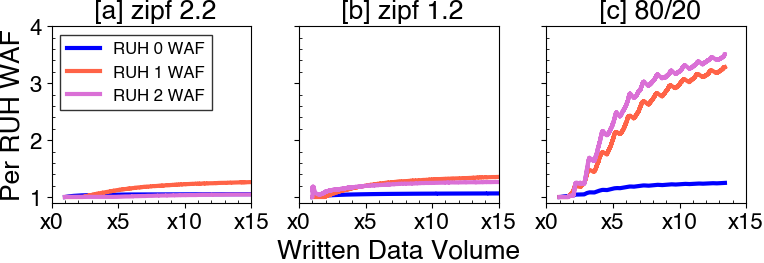

In [3]:
#------------------------------------------------------------#
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fig, ax = plt.subplots(1,3, figsize=(8,3), sharey=True)
MEDIUM_PLUS_SIZE = MEDIUM_SIZE+3
#------------------------------------------------------------#
#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
workload= [ 
            'log-gc-zipf22-fdp',
            'log-gc-zipf12-fdp',
            'log-gc-zoned-fdp',
            ]
mini_titles= [
            '[a] zipf 2.2',
            '[b] zipf 1.2',
            '[c] 80/20'
            ]
color = ['blue' , 'tomato' , 'orchid', 'gray']
bcolor = ['#89CFF0', '#FFB3AB', '#E6A9EC', '#D3D3D3']
this_dev_cap = 224
hop=5
this_dev_cap_GB = 224 * 1024 * 1024 * 1024
TEXT_FONT_SIZE=SMALL_SIZE
#subdirs=[ 'nofdp/','fdp/','fdp_share/', 'fdp_share2/', 'fdp_sharev0/'] 
data_dir = "./archive//ops-log/"
#data_dir = "/home/inho/cylon-fdp/build-femu/"

#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    
    ret = check_file_existence(data_dir,w)
    if (ret == 0):
        continue

    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    #float_re=re.compile(r'[0-9]\.[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    util_data = data_dir
    file1 = open(util_data + w, 'r')
    hbmw_total = []
    avg_util={
        0:[],
        1:[],
        2:[]
    }
    valid_util={
        0:[],
        1:[],
        2:[]
    }
    ruh_hbmw={
        0:[],
        1:[],
        2:[]
    }
    ruh_mbmw={
        0:[],
        1:[],
        2:[]
    }

    Lines = file1.readlines()
    for j, line in enumerate(Lines) : 
        line = ''.join(line).strip().replace(",", '')
        #if num_re.match(line):
        l = num_re.findall(line)
        l = [ int(x) for x in l ]
        if(len(l) <= 3 ):
            continue
        #print(l)
        #print(l[0], l[1], l[2], l[4]/l[5], type( l[4]/l[5]))
        # if l[2] != 0:
        #     print( "is_force {0} util {1} ruhid {2}".format(l[0], float(l[4]/l[5]), l[2]) )

        value_hbmw_total = 0
        for idx,id in enumerate(range(3)):
            ruhid=l[ 6 + idx*3 ]
            value=l[ 6 + idx*3 + 1]
            value_2nd=l[ 6 + idx*3 + 2]
            value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
            value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
            value_hbmw_total += value_ruh_hbmw
            if ( not (ruhid in avg_util )): #(not (key in data_column) )
                avg_util[ruhid] = [value]
                valid_util[ruhid] = [value_2nd / l[5]]
                ruh_hbmw[ruhid] = [value_ruh_hbmw  / this_dev_cap_GB]
                ruh_mbmw[ruhid] = [value_ruh_mbmw  / this_dev_cap_GB]

            else:
                avg_util[ruhid].append(value)
                valid_util[ruhid].append(value_2nd / l[5])
                ruh_hbmw[ruhid].append(value_ruh_hbmw  / this_dev_cap_GB)
                ruh_mbmw[ruhid].append(value_ruh_mbmw  / this_dev_cap_GB)
        
        hbmw_total.append( value_hbmw_total / ( this_dev_cap * 2**30 ) )

        if j > 50000:
            break
    # -------------------------- AX ---------------------------- #
    ax2=ax[i]
    bottom = np.zeros( len(avg_util[0]) )
    for c, key in enumerate(avg_util.keys()):
        
        #ax2.plot( hbmw_total , avg_util[key], color=bcolor[c])
        ax2.plot( hbmw_total ,np.array(ruh_mbmw[key]) / np.array(ruh_hbmw[key]), label="RUH {0} WAF".format(key), lw=3, color=color[c])
        #print (key, len([ x for x in avg_util[key] if x is not None]) )
        #bottom += avg_util[key]
        
    ax2.set_title(" {0}".format(mini_titles[i]), fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
    ax2.set_ylim([0.9, 4])
    ax2.set_xlim([0, 15])
    ax2.set_xticks([x*hop for x in range(0,4)])

    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
    #ax2.legend()
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    # -------------------------- AX ---------------------------- #

# --------------------------- Figure ------------------------ # 
ax[0].set_ylabel("Per RUH WAF" , fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1].set_xlabel("Written Data Volume", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0].legend(loc="upper left",prop=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE, edgecolor='k', fancybox=False)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)


ax[0].set_yticks([1,2,3,4])

plt.tight_layout()
# ------------------- #
isConference=False
if isConference:
   save_dir = "/home/inho/git/fast25-cylon-fdp/v1/F/observ/"
   fig_name = "Noisy"
   plt.savefig("{0}{1}.eps".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.png".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
# ------------------- #


# After AE run

## Fig13-AE

[Check!] ./FIO-scripts/3stream/zoned/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/fdp_share/samsung_waf_1sec.txt


[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_2.2/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zipf_1.2/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/nofdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/fdp_share/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCe/3stream/zoned/fdp/samsung_waf_1sec.txt
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/fdp/samsung_waf_1sec.txt
hbmw_list_TB 51.360086117471965
[Check!] ./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/nofdp/samsung_waf_1sec.txt
./archive/result-FIO/cylon224-PI/GCcb/zipf_2.2/n

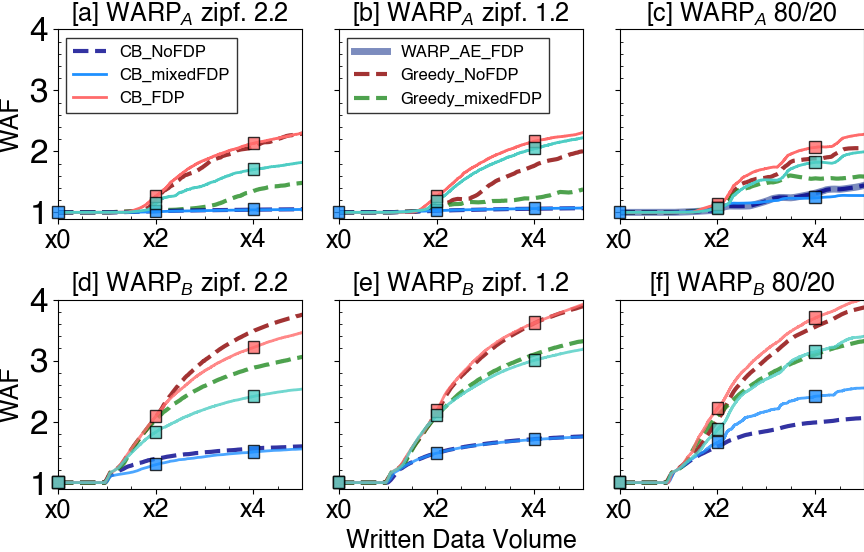

In [9]:
#------------------------------------------------------------#
fig, ax = plt.subplots(2,3, figsize=(9,6), sharey=True)
plt.style.use('tableau-colorblind10')
#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    "nofdp_R256OP20/":"#D4AF37",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
ae_greedy_colors = {
    "fdp_share/":        "#6BAF6B",  # softened green (derived from #228B22)
    "nofdp/":            "#C65A5A",  # muted red (derived from #8B0000)
    "fdp/":              "#5B6FAE",  # softened dark blue (derived from #00008B)
    
}
#--AE--AE--AE--AE--AE--AE--AE--AE--#

workload= ['zoned/']
subdirs=['fdp/']
data_dir = "./FIO-scripts/3stream/"
TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 7
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]

        #ax2 = ax[i//2][i%2].twinx()
        ax2 = ax[0][2]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=5, linestyle='-', alpha=0.8, label="WARP_AE", color=ae_greedy_colors[sdir])
#--AE--AE--AE--AE--AE--AE--AE--AE--#

#------------------------------------------------------------#

workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['nofdp/','fdp_share/','fdp/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/quick/"
data_dir = "./archive/result-FIO/cylon224-PI/GCe/3stream/"
TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 7
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]

        #ax2 = ax[i//2][i%2].twinx()
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
#------------------------------------------------------------#

workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/quick/"
data_dir = "./archive/result-FIO/cylon224-PI/GCcb/"
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        x_cut_lim = 5
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[0][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,  label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])
        #ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)

        if (re.match(sdir,"nofdp/") ) :
            #ax2.plot(range(0,len(waf_list)), waf_list, linewidth=0.1, color='red', marker='o', markersize=1, label=t_labels[j], alpha=0.5)
            #ax2.plot(hbmw_list_TB, waf_list, linewidth=1, marker='o', markersize=1, label=t_labels[j], alpha=0.5, color='red')
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0:
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                # #Text
                # ax2.text(k*hop+a, v-0.05, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                # #Box
                # ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict( fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                if k>0 :
                    #Text
                    #ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                    #Box
                    ax2.text(k*hop, v, " " , ha="center", fontsize=0.1, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
greedy_colors = {
    "fdp_share/":"#228B22",                    # Money green – deep and rich
    "nofdp/":"#8B0000",              # Power red – intense and dominant
    #"#D4AF37",          # Greedy gold – luxurious, eye-catching
    "fdp/":"#00008B"  # DarkBlue – bold, assertive, and wealth-associated
}
cost_benefit_colors = {
    "fdp_share/":"#4ECDC4",  # Benefit – calm teal (gain, positive)
    "nofdp/":"#FF6B6B",  # Cost – soft red (warning, loss)
    #"#FFE66D",  # Neutral – yellow (decision, caution, balance point)
    "fdp/":"#1E90FF"                 # Dodger Blue – vivid, clear, optimistic
}
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCe/"
data_dir ="./archive/result-FIO/warpb-cylon224-PI/GCe/3stream/"

TEXT_FONT_SIZE = 24

# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x /dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)

        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=3, linestyle='--', alpha=0.8, label="Greedy_"+sdir.replace('/','').replace('_',' '), color=greedy_colors[sdir])
        ax2.set_title("{0}".format(w.replace('/', ' ')), fontsize=BIGGER_SIZE)

        hop=2
        a=0.8
        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
#------------------------------------------------------------#
workload= ['zipf_2.2/', 'zipf_1.2/', 'zoned/']
subdirs=['fdp/', 'nofdp/', 'fdp_share/']
#data_dir = "/data/inho/nvme_fio/Cylon-FDP/warmup_v4/GC_enbaled/PI-GCcb/"
data_dir ="./archive/result-FIO/warpb-cylon224-PI/GCcb/3stream/"
#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    for j,sdir in enumerate(subdirs):
        filename="samsung_waf_1sec.txt"
        ret = check_file_existence(data_dir+w+sdir,filename)
        if (ret == 0):
            continue
        info_list = waf_log_to_waf_lists(data_dir+w+sdir)
        waf_list = info_list[0]
        hbmw_list = info_list[1] 
        mbmw_list= info_list[2] 
        erase_list= info_list[3] 
        dev_cap = 224/1024
        hbmw_list_TB = [ x/dev_cap for x in hbmw_list]
        
        assert (len(waf_list) == len(hbmw_list)) and (len(waf_list) > 0)
        #waf_log_to_waf_lists(data_dir+up+bs,filename )
        #    return [waf_list, hbmw_list , mbmw_list, erase_list]
        ax2 = ax[1][i]
        #print(w, sdir, len(hbmw_list_TB))
        ax2.plot(hbmw_list_TB, waf_list, linewidth=2,alpha=0.8, label="CB_"+sdir.replace('/','').replace('_',' '), color=cost_benefit_colors[sdir])

        my_waf_text_index = get_waf_by_aligned_hbmw(data_dir+w+sdir, dev_cap, filename, x_cut_lim)
        if (re.match(sdir,"nofdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
        
        elif (re.match(sdir,"fdp/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # if k> 0:
                #     ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))
                #ax2.text(k*hop, v, " " , ha="center",  fontsize=5, bbox=dict(boxstyle='circle', fc=cost_benefit_colors[sdir], ec="k", alpha=0.8))

        elif (re.match(sdir,"fdp_share/") ) :
            for k, v in enumerate(my_waf_text_index[::hop]):
                #Text
                # ax2.text(k*hop+a+0.1, v-0.1, "%.2f" %v, ha="center", fontsize=TEXT_FONT_SIZE)
                #Box
                ax2.text(k*hop, v, " " , ha="center", fontsize=0.01, bbox=dict(facecolor=cost_benefit_colors[sdir], alpha=0.8))

#------------------------------------------------------------#
MEDIUM_PLUS_SIZE=MEDIUM_SIZE+2

# Collect handles and labels from the full figure
handles, labels = ax[0][2].get_legend_handles_labels()

# Split into two groups (first 3 and last 3, adjust as needed)
handles1, labels1 = handles[:3], labels[:3]
handles2, labels2 = handles[3:], labels[3:]

# Rename labels (example)
labels1 = ["WARP_AE_FDP", "Greedy_NoFDP", "Greedy_mixedFDP", "Greedy_FDP"]
labels2 = ["CB_NoFDP", "CB_mixedFDP", "CB_FDP"]

# Place legends in different axes
ax[0][0].legend(handles2, labels2, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)
ax[0][1].legend(handles1, labels1, loc="upper left", frameon=True, prop=helvetica_prop, fontsize=MEDIUM_SIZE , edgecolor='k' , fancybox=False)


ax[0][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_ylabel("WAF", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

#fig.text(0.34, 0.01,  r'Written Data Volume', fontsize=MEDIUM_SIZE+2)
ax[1][1].set_xlabel(r'Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_title(r"[a] WARP$_{A}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][1].set_title(r"[b] WARP$_{A}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0][2].set_title(r"[c] WARP$_{A}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][0].set_title(r"[d] WARP$_{B}$ zipf. 2.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][1].set_title(r"[e] WARP$_{B}$ zipf. 1.2", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1][2].set_title(r"[f] WARP$_{B}$ 80/20", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


for i in range(2):
    for j in range(3):
        ax2 = ax[i][j]
        ax2.tick_params(axis='x', which='minor', direction='in')
        ax2.tick_params(axis='y', which='minor', direction='in')
        ax2.minorticks_on()
        ax2.set_xlim([0,5])
        ax2.set_ylim([0.9 , 4.0])
        ax2.set_xticks([0,2,4])
        labels = [label.get_text() for label in ax2.get_xticklabels()]
        ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

ax[0][0].set_yticks([1, 2, 3, 4])
ax[1][0].set_yticks([1, 2, 3, 4])


fig.tight_layout(rect=[0, 0.02, 1, 1])

#------------------------#
isConference = True
if (isConference) :
    save_dir = "./archive"
    fig_name = "3stream_WARP_AE"
    #plt.savefig("{0}{1}.eps".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.png".format(save_dir,fig_name) ) #, dpi=100)
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name)) #, dpi=100)
#------------------------#
plt.show()


## Fig15-AE

[Check!] ./archive/ops-log/log-gc-zipf22-fdp
anchor_index  1  skipped 


anchor_index  2  skipped 
[Check!] ./archive/ops-log/log-gc-zipf12-fdp
anchor_index  1  skipped 
anchor_index  2  skipped 
[Check!] ./archive/ops-log/log-gc-zoned-fdp
anchor_index  1  skipped 
[Check!] ./archive/ops-log/log-gc-zoned-fdp-AE
anchor_index  1  skipped 


/tmp/ipykernel_2387687/1846260539.py:380: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


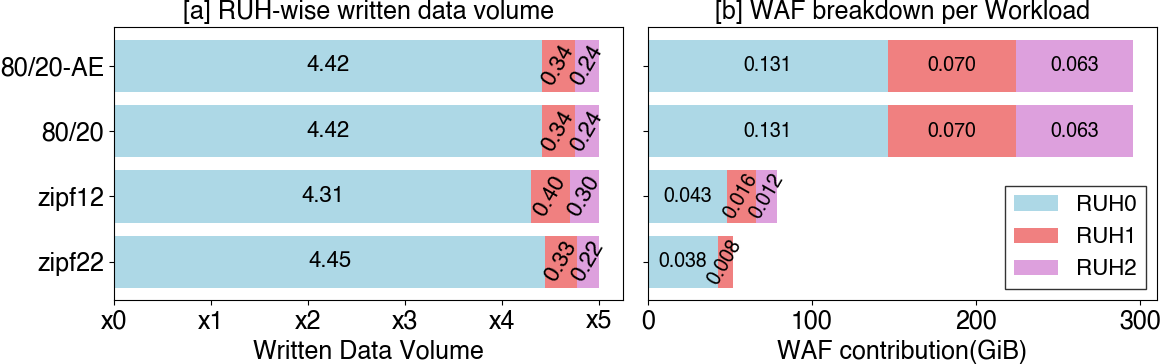

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

#=======================================================================================#
this_dev_cap_GB = 224 * 1024 * 1024 * 1024
this_dev_cap = 224

data_dir = "./archive/ops-log/"
workload = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
    'log-gc-zoned-fdp-AE',

]
hbmw_data = {
    'log-gc-zipf22-fdp': [[-1], [-1], [-1]],
    'log-gc-zipf12-fdp': [[-1], [-1], [-1]],
    'log-gc-zoned-fdp':  [[-1], [-1], [-1]],
    'log-gc-zoned-fdp-AE':  [[-1], [-1], [-1]],
}
mbmw_data = {
    'log-gc-zipf22-fdp': [[-1], [-1], [-1]],
    'log-gc-zipf12-fdp': [[-1], [-1], [-1]],
    'log-gc-zoned-fdp':  [[-1], [-1], [-1]],
    'log-gc-zoned-fdp-AE':  [[-1], [-1], [-1]],
}

bar_colors = ['lightblue', 'lightcoral', 'lightblue', 'lightcoral']

group_gap = 1.1
inner_gap = 0.4
x = []
for g in range(3):  # 3 RUH groups
    base = g * group_gap + g * 2 * inner_gap
    x.extend([base + i * inner_gap for i in range(2)])

x = np.array(x)

x_labels = []
for r in [0, 1, 2]:
    #x_labels.extend([f"RUH{r}\n5\nhbmw", f"RUH{r}\n5\nmbmw"])
    x_labels.extend([f"RUH{r} h.", f"RUH{r} m."])
            
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    ret = check_file_existence(data_dir,w)
    if (ret == 0):
        continue
    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    #float_re=re.compile(r'[0-9]\.[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    util_data = data_dir
    file1 = open(util_data + w, 'r')
    hbmw_total = []
    avg_util={
        0:[],
        1:[],
        2:[]
    }
    valid_util={
        0:[],
        1:[],
        2:[]
    }
    ruh_hbmw={
        0:[],
        1:[],
        2:[]
    }
    ruh_mbmw={
        0:[],
        1:[],
        2:[]
    }    

    # --------------------------- FILE ------------------------ # 
    cnt=0
    anchor_index=0    
    x_point = 5
    local_ruh_hbmw=[[],[],[]]
    local_ruh_mbmw=[[],[],[]]
    
    Lines = file1.readlines()
    for j, line in enumerate(Lines) : 
        line = ''.join(line).strip().replace(",", '')
        #if num_re.match(line):
        l = num_re.findall(line)
        l = [ int(x) for x in l ]
        if(len(l) == 1 ):
            continue
        #print(l)
        #print(l[0], l[1], l[2], l[4]/l[5], type( l[4]/l[5]))
        # if l[2] != 0:
        #     print( "is_force {0} util {1} ruhid {2}".format(l[0], float(l[4]/l[5]), l[2]) )

        value_hbmw_total = 0
        for idx,id in enumerate(range(3)):
            ruhid=l[ 6 + idx*3 ]
            value=l[ 6 + idx*3 + 1]
            value_2nd=l[ 6 + idx*3 + 2]
            value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
            value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
            value_hbmw_total += value_ruh_hbmw
            if ( not (ruhid in avg_util )): #(not (key in data_column) )
                avg_util[ruhid] = [value]
                valid_util[ruhid] = [value_2nd / l[5]]
                ruh_hbmw[ruhid] = [value_ruh_hbmw  / this_dev_cap_GB]
                ruh_mbmw[ruhid] = [value_ruh_mbmw  / this_dev_cap_GB]

            else:
                avg_util[ruhid].append(value)
                valid_util[ruhid].append(value_2nd / l[5])
                ruh_hbmw[ruhid].append(value_ruh_hbmw  / this_dev_cap_GB)
                ruh_mbmw[ruhid].append(value_ruh_mbmw  / this_dev_cap_GB)
                
        
        hb = value_hbmw_total / ( this_dev_cap * 2**30 )
        hbmw_total.append(hb)
        
        if ( (x_point*(anchor_index+1)-0.1 < hb )) and ( hb <= (x_point*(anchor_index+1)+0.1) ):
            for idx,id in enumerate(range(3)):
                value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
                value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
                #local_ruh_waf[idx].append( value_ruh_mbmw / value_ruh_mbmw )
                local_ruh_hbmw[idx].append( value_ruh_hbmw ) 
                local_ruh_mbmw[idx].append( value_ruh_mbmw ) 
                #print(anchor_index, local_ruh_hbmw ,  local_ruh_mbmw)
            cnt+=1
            continue
        else : 
            if cnt >= 1:
                
                #print(anchor_index, local_ruh_hbmw ,  local_ruh_mbmw)
                for idx,id in enumerate(range(3)):
                    #local_ruh_waf =  np.mean(local_ruh_waf[idx])
                    try:
                        hbmw_data[w][idx][anchor_index] = np.mean(local_ruh_hbmw[idx])/ 2**30
                        mbmw_data[w][idx][anchor_index] = np.mean(local_ruh_mbmw[idx])/ 2**30
                    except IndexError:
                        print("anchor_index ", anchor_index, " skipped ")
                        break
                cnt=0
                local_ruh_hbmw=[[],[],[]]
                local_ruh_mbmw=[[],[],[]]                    
                anchor_index+=1
        if j > 15000 : 
            break
    # --------------------------- FILE ------------------------ # 

    values = []
    for ruh in range(3):
        values.append(hbmw_data[w][ruh][0])  # 5 hbmw
        values.append(mbmw_data[w][ruh][0])  # 5 mbmw
        
workloads = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
    'log-gc-zoned-fdp-AE',
]
workloads_name = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    '80/20',
    '80/20-AE',
]
colors = ['lightblue', 'lightcoral', 'plum']
ruh_labels = ['RUH0', 'RUH1', 'RUH2']
y_pos = np.arange(len(workloads))

# Total device capacity in GiB
device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

# Compute stacked bar data
bar_segments = []  # 3 workloads x 3 RUHs
bar_segments2= []  # 3 workloads x 3 RUHs

total_rhmw_values = []

for w in workloads:
    ruh_deltas = []
    ruh_mbmw = []
    ruh_hbmw = []
    for ruh in range(3):
        try:
            mbmw = mbmw_data[w][ruh][0]
            hbmw = hbmw_data[w][ruh][0]
        except:
            mbmw, hbmw = 0, 0
        #delta = max(mbmw - hbmw, 0)
        delta = hbmw

        ruh_deltas.append(delta)
        ruh_mbmw.append(mbmw)
        ruh_hbmw.append(hbmw)

    total_HMW = sum(ruh_hbmw)
    rHMW = total_HMW / device_capacity_gib
    total_rhmw_values.append(rHMW)

    # Normalize deltas to rHMW length
    normalized_segments = []
    GB_segments = []
    for delta in ruh_deltas:
        normalized_len = rHMW * (delta / total_HMW) if total_HMW > 0 else 0
        GB_segments.append(normalized_len * 224)
        normalized_segments.append(normalized_len)

    bar_segments.append(normalized_segments)
    bar_segments2.append(GB_segments)

# Plot horizontal stacked bars
fig, ax = plt.subplots(1,2, figsize=(12, 4), sharey=True)
left = np.zeros(len(workloads))
#------------------- #

for i in range(3):  # RUH 0–2
    #bars =ax[0].barh(y_pos, [bar_segments2[w][i] for w in range(len(workloads))],
    #        left=left, color=colors[i], label=ruh_labels[i])
    #left += [bar_segments2[w][i] for w in range(len(workloads))]
    bars =ax[0].barh(y_pos, [bar_segments[w][i] for w in range(len(workloads))],
            left=left, color=colors[i], label=ruh_labels[i])
    left += [bar_segments[w][i] for w in range(len(workloads))]
    
    
    
    # DLWA per RUH annotation
    for j, bar in enumerate(bars):
        #dlwa_val = dlwa_segments[j][i]
        width = bar.get_width()
        if width > 0.01:  # Avoid clutter for small segments
            if i > 0:
                ax[0].text(bar.get_x() + width / 2, bar.get_y() + bar.get_height()/2,
                    f'{bar_segments[j][i] :.2f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black', rotation=60)
            else:
                ax[0].text(bar.get_x() + width / 2, bar.get_y() + bar.get_height()/2,
                    f'{bar_segments[j][i] :.2f}', ha='center', va='center', fontsize=MEDIUM_SIZE, color='black')
#------------------- #

# For legend and color clarity
ruh_labels = ['RUH0', 'RUH1', 'RUH2']
colors = ['lightblue', 'lightcoral', 'plum']
workloads = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    'log-gc-zoned-fdp',
    'log-gc-zoned-fdp-AE',
]
workloads_names = [
    'log-gc-zipf22-fdp',
    'log-gc-zipf12-fdp',
    '80/20',
    '80/20-AE',

]
# Total device capacity in GiB
device_capacity = 224 * 1024 * 1024 * 1024  # bytes
device_capacity_gib = device_capacity / 2**30

# Build the stacked bar components
bar_segments = []  # [ [ruh0_diff, ruh1_diff, ruh2_diff], ... ]
dlwa_texts = []
dlwa_segments = []


for w in workloads:
    diffs = []
    ruh_deltas = []
    ruh_dlwas = []
    ruh_mbmw = []
    ruh_hbmw = []
    
    for ruh in range(3):
        try:
            val_mbmw = mbmw_data[w][ruh][0]
            val_hbmw = hbmw_data[w][ruh][0]
            diff = max(val_mbmw - val_hbmw, 0)
        except (IndexError, KeyError):
            diff = 0
        diffs.append(diff)
        delta = diff
        ruh_deltas.append(delta)
        ruh_mbmw.append(val_mbmw)
        ruh_hbmw.append(val_hbmw)
        # Avoid div by 0
        ruh_dlwa = val_mbmw / val_hbmw if val_hbmw > 0 else 0
        ruh_dlwas.append(ruh_dlwa)
    
    total_mbmw = sum(ruh_mbmw)
    total_hbmw = sum(ruh_hbmw)
    
    rHMW = total_mbmw / device_capacity_gib if device_capacity_gib > 0 else 0
    dlwa_total = total_mbmw / total_hbmw if total_hbmw > 0 else 0

    dlwa_texts.append(dlwa_total)
    dlwa_segments.append(ruh_dlwas)
    
    
    # Normalize segment lengths
    total_HMW = sum(ruh_mbmw)
    # norm_segs = []
    # for delta in ruh_deltas:
    #     normalized_len = rHMW * (delta / total_HMW) if total_HMW > 0 else 0
    #     norm_segs.append(normalized_len)
    # bar_segments.append(norm_segs)

    bar_segments.append(diffs)
    

# Convert to numpy arrays for stacking
bar_segments = np.array(bar_segments)  # shape (3, 3)
y_pos = np.arange(len(workloads))  # 0, 1, 2

# Plot
left = np.zeros(len(workloads))  # initialize stack left edge

for i in range(3):  # for each RUH
    bars = ax[1].barh(y_pos, bar_segments[:, i], left=left, color=colors[i], label=ruh_labels[i])
    # DLWA_RUH_i = mbmw_i / total_hbmw
    for j, bar in enumerate(bars):
        mbmw_i = mbmw_data[workloads[j]][i][0]
        hbmw_i = hbmw_data[workloads[j]][i][0]
        total_hbmw = sum(hbmw_data[workloads[j]][k][0] for k in range(3))
        dlwa_contrib = (mbmw_i-hbmw_i) / total_hbmw if total_hbmw > 0 else 0

        width = bar.get_width()
        if width > 0.01:
            if ( re.match( '.*zipf22' , workloads[j] ) != None ) and ( i>0 ):
                if (i<2):
                    ax[1].text(
                        bar.get_x() + width / 2,
                        bar.get_y() + bar.get_height() / 2,
                        f'{dlwa_contrib:.3f}',
                        ha='center',
                        va='center',
                        fontsize=MEDIUM_SIZE-2,
                        color='black',
                        rotation=60
                    )
            elif ( re.match( '.*zipf12' , workloads[j] ) != None ) and ( i>0 ):
                ax[1].text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{dlwa_contrib:.3f}',
                    ha='center',
                    va='center',
                    fontsize=MEDIUM_SIZE-2,
                    color='black',
                    rotation=60
                )
            else:
                ax[1].text(
                    bar.get_x() + width / 2,
                    bar.get_y() + bar.get_height() / 2,
                    f'{dlwa_contrib:.3f}',
                    ha='center',
                    va='center',
                    fontsize=MEDIUM_SIZE-2,
                    color='black'
                )
    left += bar_segments[:, i]
#------------------- #
# Labels & aesthetics
ax[0].set_yticks(y_pos)
ax[0].set_yticklabels([w.replace('log-gc-', '').replace('-fdp','') for w in workloads_name], fontsize=MEDIUM_PLUS_SIZE)
ax[0].set_xticks([0,1,2,3,4,5])
ax[0].set_xlabel('Written Data Volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

labels = [label.get_text() for label in ax[0].get_xticklabels()]
ax[0].set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)

labels = [label.get_text() for label in ax[1].get_xticklabels()]
ax[1].set_xticklabels([t for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)


ax[1].set_xlabel('WAF contribution(GiB)', fontsize=MEDIUM_PLUS_SIZE)
ax[0].set_title('[a] RUH-wise written data volume', fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1].set_title('[b] WAF breakdown per Workload', fontsize=MEDIUM_PLUS_SIZE)

ax[1].legend(loc='lower right', fontsize=MEDIUM_SIZE, frameon=True, edgecolor='k', fancybox=False)


plt.tight_layout()
#------------------- #
isConference=False
if isConference:
    save_dir = "/home/inho/git/fast25-cylon-fdp/v0/F/observ/"
    fig_name = "fdp_3syn_investigation-HBMWDLWA"
    plt.savefig("{0}{1}.eps".format(save_dir,fig_name))
    plt.savefig("{0}{1}.pdf".format(save_dir,fig_name))
    plt.savefig("{0}{1}.png".format(save_dir,fig_name))
    plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
#------------------- #


[Check!] ./archive/ops-log/log-gc-zipf22-fdp


[Check!] ./archive/ops-log/log-gc-zipf12-fdp
[Check!] ./archive/ops-log/log-gc-zoned-fdp
[Check!] ./archive/ops-log/log-gc-zoned-fdp-AE


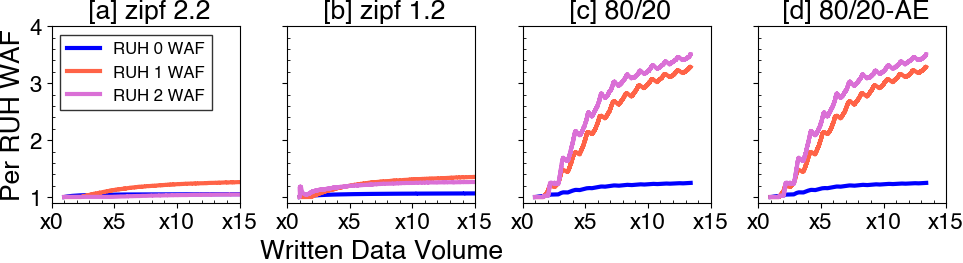

In [20]:
#------------------------------------------------------------#
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
fig, ax = plt.subplots(1,4, figsize=(10,3), sharey=True)
MEDIUM_PLUS_SIZE = MEDIUM_SIZE+3
#------------------------------------------------------------#
#fdev="Samsung-FDP-PM9D3a-MZWL67T6HBLC-7.68TB-PCIeGen5/"
workload= [ 
            'log-gc-zipf22-fdp',
            'log-gc-zipf12-fdp',
            'log-gc-zoned-fdp',
            'log-gc-zoned-fdp-AE',
            ]
mini_titles= [
            '[a] zipf 2.2',
            '[b] zipf 1.2',
            '[c] 80/20',
            '[d] 80/20-AE'
            ]
color = ['blue' , 'tomato' , 'orchid', 'gray']
bcolor = ['#89CFF0', '#FFB3AB', '#E6A9EC', '#D3D3D3']
this_dev_cap = 224
hop=5
this_dev_cap_GB = 224 * 1024 * 1024 * 1024
TEXT_FONT_SIZE=SMALL_SIZE
#subdirs=[ 'nofdp/','fdp/','fdp_share/', 'fdp_share2/', 'fdp_sharev0/'] 
data_dir = "./archive/ops-log/"
#data_dir = "/home/inho/cylon-fdp/build-femu/"

#util = ['{0}/'.format(x*100) for x in np.arange(1,6) ]
#bbss = ['{0}K/'.format(4**x) for x in np.arange(1,5)]
#print(bbss)
# --------------------------- Figure ------------------------ # 
for i, w in enumerate(workload):
    
    ret = check_file_existence(data_dir,w)
    if (ret == 0):
        continue

    # ----------------------- Regular Expr. ------------------------- #
    num_re=re.compile(r'[0-9]+')
    #float_re=re.compile(r'[0-9]\.[0-9]+')
    hbmw_re=re.compile(r'.*(HBMW)')
    mbmw_re=re.compile(r'.*(MBMW)')
    mbe_re=re.compile(r'.*(MBE)')
    util_data = data_dir
    file1 = open(util_data + w, 'r')
    hbmw_total = []
    avg_util={
        0:[],
        1:[],
        2:[]
    }
    valid_util={
        0:[],
        1:[],
        2:[]
    }
    ruh_hbmw={
        0:[],
        1:[],
        2:[]
    }
    ruh_mbmw={
        0:[],
        1:[],
        2:[]
    }

    Lines = file1.readlines()
    for j, line in enumerate(Lines) : 
        line = ''.join(line).strip().replace(",", '')
        #if num_re.match(line):
        l = num_re.findall(line)
        l = [ int(x) for x in l ]
        if(len(l) <= 3 ):
            continue
        #print(l)
        #print(l[0], l[1], l[2], l[4]/l[5], type( l[4]/l[5]))
        # if l[2] != 0:
        #     print( "is_force {0} util {1} ruhid {2}".format(l[0], float(l[4]/l[5]), l[2]) )

        value_hbmw_total = 0
        for idx,id in enumerate(range(3)):
            ruhid=l[ 6 + idx*3 ]
            value=l[ 6 + idx*3 + 1]
            value_2nd=l[ 6 + idx*3 + 2]
            value_ruh_hbmw = l[ 15 + idx*3 + 1 ]
            value_ruh_mbmw = l[ 15 + idx*3 + 2 ]
            value_hbmw_total += value_ruh_hbmw
            if ( not (ruhid in avg_util )): #(not (key in data_column) )
                avg_util[ruhid] = [value]
                valid_util[ruhid] = [value_2nd / l[5]]
                ruh_hbmw[ruhid] = [value_ruh_hbmw  / this_dev_cap_GB]
                ruh_mbmw[ruhid] = [value_ruh_mbmw  / this_dev_cap_GB]

            else:
                avg_util[ruhid].append(value)
                valid_util[ruhid].append(value_2nd / l[5])
                ruh_hbmw[ruhid].append(value_ruh_hbmw  / this_dev_cap_GB)
                ruh_mbmw[ruhid].append(value_ruh_mbmw  / this_dev_cap_GB)
        
        hbmw_total.append( value_hbmw_total / ( this_dev_cap * 2**30 ) )

        if j > 50000:
            break
    # -------------------------- AX ---------------------------- #
    ax2=ax[i]
    bottom = np.zeros( len(avg_util[0]) )
    for c, key in enumerate(avg_util.keys()):
        
        #ax2.plot( hbmw_total , avg_util[key], color=bcolor[c])
        ax2.plot( hbmw_total ,np.array(ruh_mbmw[key]) / np.array(ruh_hbmw[key]), label="RUH {0} WAF".format(key), lw=3, color=color[c])
        #print (key, len([ x for x in avg_util[key] if x is not None]) )
        #bottom += avg_util[key]
        
    ax2.set_title(" {0}".format(mini_titles[i]), fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
    ax2.set_ylim([0.9, 4])
    ax2.set_xlim([0, 15])
    ax2.set_xticks([x*hop for x in range(0,4)])

    labels = [label.get_text() for label in ax2.get_xticklabels()]
    ax2.set_xticklabels([f"x{t}" for t in labels], fontproperties=helvetica_prop, fontsize=MEDIUM_SIZE)
    #ax2.legend()
    ax2.tick_params(axis='x', which='minor', direction='in')
    ax2.tick_params(axis='y', which='minor', direction='in')
    ax2.minorticks_on()
    # -------------------------- AX ---------------------------- #

# --------------------------- Figure ------------------------ # 
ax[0].set_ylabel("Per RUH WAF" , fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[1].set_xlabel("Written Data Volume", fontproperties=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE)
ax[0].legend(loc="upper left",prop=helvetica_prop, fontsize=MEDIUM_PLUS_SIZE, edgecolor='k', fancybox=False)
for label in ax[0].get_yticklabels():
    label.set_fontproperties(helvetica_prop)
    label.set_fontsize(MEDIUM_SIZE)


ax[0].set_yticks([1,2,3,4])

plt.tight_layout()
# ------------------- #
isConference=False
if isConference:
   save_dir = "./"
   fig_name = "Noisy"
   plt.savefig("{0}{1}.eps".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.pdf".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.png".format(save_dir,fig_name) )
   plt.savefig("{0}{1}.jpeg".format(save_dir,fig_name))
# ------------------- #
